In [88]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pyecharts import Map, Geo

In [90]:
df = pd.read_excel('assignment1.xlsx')

Note：

1、此次处理的数据在 assignment1 的数据中进行了筛选，分析数据为开始吧平台2018年1月－－9月上线项目数据。文件 assignment1.xlsx 为经过处理后的数据文件。

2、开始吧众筹平台为国内最大股权众筹平台，主要帮助国内中小企业实现融资。该报告出发点为开始吧平台同行业新入局者做竞对分析，旨在通过分析并借鉴开始吧平台项目情况和经验进行精准定位及提供制定策略参考。

# 开始吧众筹平台1月－－9月上线项目表现（竞对分析）
Kaistart.com performance （the first 3 quarters of 2018）

## 一、1月－－9月平台上线项目各月总数及各月认筹总额                   
      Kaistart.com Monthly Perfomance By Projects Amounts and Rasing Money

In [91]:
from pyecharts import Bar

pd_df = df.groupby(['Month_launch'])['RaisingMoney'].sum().reset_index()

attr = pd_df.Month_launch

pd_df1 = pd.DataFrame(df['Month_launch'])
v1 = pd_df1.Month_launch.value_counts().sort_index()
v2 = pd_df.RaisingMoney

    
bar1 = Bar("Monthly performance by project counts and rasingmoney",title_pos="left")
bar1.add("by Month_launch",attr, v1, mark_line=["average"],legend_pos='right')
bar1.add("by RaisingMoney", attr, v2, mark_line=["average"],legend_pos='right')

bar1
bar1.render('monthlyperformance.html')
from IPython.display import IFrame
IFrame('monthlyperformance.html', width=700, height=400)

从认筹额来看，前3季度整体呈下降趋势。其中，1月份为前3季度认筹额最高，2月份为业绩表现最差月份，或与该月为中国农历新年月有关。结合2017年全年数据，第三季度经常是业绩爆发增长阶段，但2018年平台该季度表现持续低迷。

## 二、分布：认筹额、项目种类、上线日期（星期）及标题高频词分布情况
    Distribution by rasing money/types of projects/launch time and word frequency of titles

### 1.按认筹额划分的项目分布
By rasing money interval

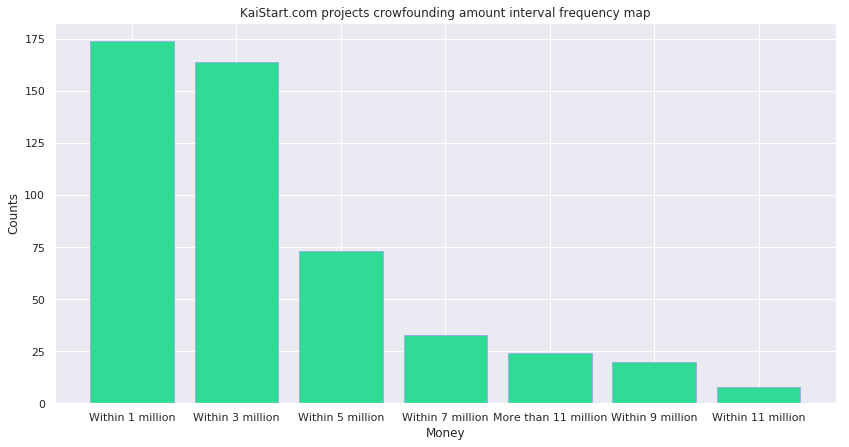

In [92]:
money_counts=df['Level'].value_counts().sort_values(ascending=False) #sort values
money = pd.DataFrame(money_counts)
fig = plt.figure(figsize=(14,7)) #adjust size
plt.bar(money.index, money.Level,color = '#30DB96',edgecolor = '#90b4e5') #change color of the bars

plt.title('KaiStart.com projects crowfounding amount interval frequency map') #plot title and label name
plt.xlabel('Money')
plt.ylabel('Counts')
plt.show()

该平台上线的项目融资额及项目分布数呈正相关关系，即融资额越小的项目，数量占比越大。从上图可知，该平台融资额在300万以内的项目占多数，可以推测该公司主要客户为中小企业。

### 2.按行业所属的项目分布
   By industry which the project belongs to

In [93]:
pd.DataFrame(df['Tag'].value_counts())

,Tag
休闲,134
民宿,125
农业,109
餐饮,98
酒店,30


In [94]:
from pyecharts import Pie
pie = Pie("Industry ratio of Kaistart.com projects by project counts", subtitle="2018.1-2018.9",title_pos='left',width=900)
counts=pd.DataFrame(df['Tag'].value_counts())
country=counts['Tag']
pie.add("country_percent",counts.index,country ,center=[40,50],is_legend_show=True,is_label_show= True,legend_orient="horizontal",legend_pos="right")

pie.render('industryperformance.html')
from IPython.display import IFrame
IFrame('industryperformance.html', width=700, height=400)


该公司涉及休闲、民宿、农业、餐饮及酒店5大行业。从项目数量来看，休闲版块项目数最多。作为小众的民宿行业，项目数量占比远大于发展更成熟的酒店行业，或与酒店行业不需要通过众筹方式融资有关，或该公司决策者认为酒店行业在股权众筹领域并非一个适配行业。

### 3.按所属地区分布
By district where the project is located in

In [95]:
pd_df2 = pd.DataFrame(df['Province'])
v3 = pd_df2.Province.value_counts().sort_index()

pd_df2 = pd.DataFrame(df['Province'])
v3 = pd_df2.Province.value_counts().sort_index()

province_distribution = v3
provice=list(province_distribution.keys())

type(province_distribution)
values = []
for a in province_distribution:
    values.append(a)
    
map = Map("Kaistart.com projects distribution in China","2018.1-2018.9", width=1200, height=600)
map.add("", provice, values, visual_range=[0, 50],  maptype='china', is_visualmap=True,
    visual_text_color='#000')
# map.show_config()
map.render(path="Kaistart.com projects distribution in China.html")

#### （注：生成的 html 在文件所在根目录）

该公司业务主要集中在北京、江浙沪、云川及福建广东一带。浙江上线项目数最多，或与其总部在杭州有关。同时，密集区均有该公司分部，可以推测该公司着力战略布局在上述地区，西北地区未有涉猎或与该地区经济发展水平和受众对股权众筹接受度低有关。

### 4.按上线时间分布
By time when the project launch

In [96]:
pd.DataFrame(df['Time_Launch'].value_counts())

,Time_Launch
Friday,105
Tuesday,100
Thursday,91
Wednesday,89
Saturday,48
Monday,40
Sunday,23


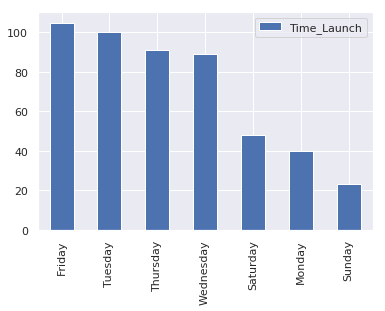

In [97]:
pd.DataFrame(df['Time_Launch'].value_counts()).plot(kind='bar')

该平台主要在周二 周三 周四 周五上线项目，周日项目上线数最少。可以推测，该策略选择或与该平台用户活跃情况相关。

### 5.标题高频词分布
Word frequency of titles

In [98]:
import jieba
text = open('detail.txt',"r").read()

#cut words
words = jieba.cut(text)

#set stopwords
# filepath = 'stopwords.txt'
# stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]

stopwords = "stop_words.txt"

#remove stopwords
processed_word_list = []
for word in words:
    if word not in stopwords and len(word)>1: #remove single word
        processed_word_list.append(word)

#processed_word_list

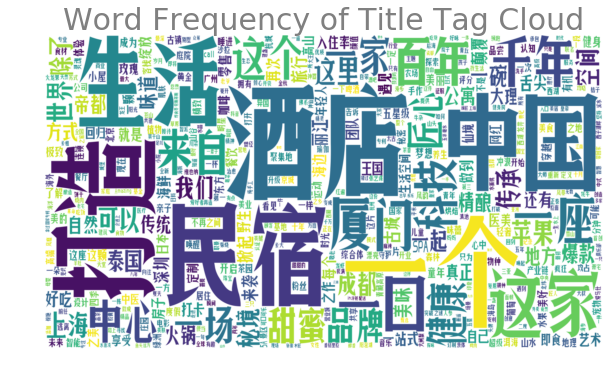

In [99]:
import matplotlib.pyplot as plt
from PIL import Image
import wordcloud
import numpy as np

def tag_cloud(text):
    mask = np.array(Image.open('ditu1.png')) #set mask, you can change to the picture you like, but it must have a high color contrast
    wc = wordcloud.WordCloud(mode='RGBA',background_color='white',max_words=500,stopwords=stopwords,max_font_size=300,font_path='./逐浪马列大楷体.otf',mask=mask)
    wc.generate(' '.join(text))
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Frequency of Title Tag Cloud', loc='Center', fontsize=30,color="gray")
    plt.show()
    return plt.show()
tag_cloud(processed_word_list)

## 三、相关性
Correlation

### 上线日期与融资额表现相关性 
The relation between date(week) and the amount of rasing money

In [100]:
sns.set(font='SimHei')
pd_df = df.groupby(['Time_Launch'])['RaisingMoney'].mean().reset_index().sort_values("RaisingMoney",ascending=False) 

Text(0.5, 1.0, 'RaisingMoney_Time Launch(date)')

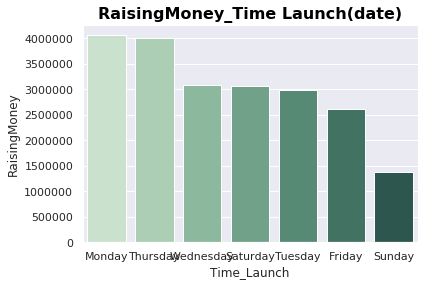

In [101]:
ax = sns.barplot(x='Time_Launch', y='RaisingMoney',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) 
plt.title('RaisingMoney_Time Launch(date)', color='black', fontsize=16, weight='bold')

周一和周四当天上线项目认筹额表现最佳，周三 周六 周二上线项目认筹成绩居中，周五和周日上线项目认筹成绩较差，周五和周日数据表现较差或与用户在当天大多处于开始放假和放假状态即将结束，大多用户脱离手机状态有关。

注：开始吧平台项目上线均在每天20:00左右。

## 四、结论
Conclusion

作为新加入同行业竞争者，从以上数据分析可知：

1.二月可能是行业低谷，或与该月为新年前后日期有关。作为新入局者，可以参考该策略，及时避免该时间段过度投入而导致的不必要损失。

2.从认筹额分布看，作为新入局玩家若选择差异化策略，可以将目标客户调整到中大型企业。

3.从行业分布来看，发展更成熟但并未被开始吧着力投入发展的酒店行业，是新入局玩家可以选择的优质细分市场。

4.选择地区时，新入局玩家需要考虑到该地区经济发展情况及当地受众对股权众筹的接受度。同时，着力挖掘利用公司所在地资源也是可借鉴的有效经验。

5.项目上线时间选择上，周五上线项目最多，但单个认筹数据表现最差，优质重点项目应尽量避开于当天上线。